<a href="https://colab.research.google.com/github/Legendkiller9855/Projects_Python/blob/main/Netflix_Visualization_Model_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/shailajakodag1/netflix-titlescsv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: krishangupta9855
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/shailajakodag1/netflix-titlescsv


100%|██████████| 1.34M/1.34M [00:00<00:00, 420MB/s]

In [5]:
#Correct Way of Visualization of a Dataset.
"""
1) Load the Data (Read the csv file using pandas.)
2) Clean the Data (Handle Missing Values,remove duplicates , fix columns if needed.)
3) Understand the Data (Use head(),info(),descibe() to explore the dataset.)
4) Identify the questions (What do we want to know?(E.g:movies vs shows , content ratings,etc. ))
5) Visualize the Data(EDA)  (Use Matplotlib to draw charts and answer these questions visually.)
6) Save the plots (Use plt.savefig() for your reports.)
"""

'\n1) Load the Data (Read the csv file using pandas.)\n2) Clean the Data (Handle Missing Values,remove duplicates , fix columns if needed.)\n3) Understand the Data (Use head(),info(),descibe() to explore the dataset.)\n4) Identify the questions (What do we want to know?(E.g:movies vs shows , content ratings,etc. ))\n5) Visualize the Data(EDA)  (Use Matplotlib to draw charts and answer these questions visually.)\n6) Save the plots (Use plt.savefig() for your reports.)\n'

In [8]:
"""
import pandas as pd
df = pd.read_csv("/content/netflix-titlescsv/netflix_titles.csv")

df.head() #Will Display first 5 rows of the file.
df.info() #Tells us the number of rows and columns the dataset has and tells if there is any null value present or not.
df.describe() #Used to find statisticts of the dataframe
df.shape #Tells number of rows to number of columns
df.columns #Tells name of all the columns


print(df.isnull().sum())
print(df.describe())
"""

'\nimport pandas as pd\ndf = pd.read_csv("/content/netflix-titlescsv/netflix_titles.csv")\n\ndf.head() #Will Display first 5 rows of the file.\ndf.info() #Tells us the number of rows and columns the dataset has and tells if there is any null value present or not.\ndf.describe() #Used to find statisticts of the dataframe\ndf.shape #Tells number of rows to number of columns\ndf.columns #Tells name of all the columns\n\n\nprint(df.isnull().sum())\nprint(df.describe())\n'

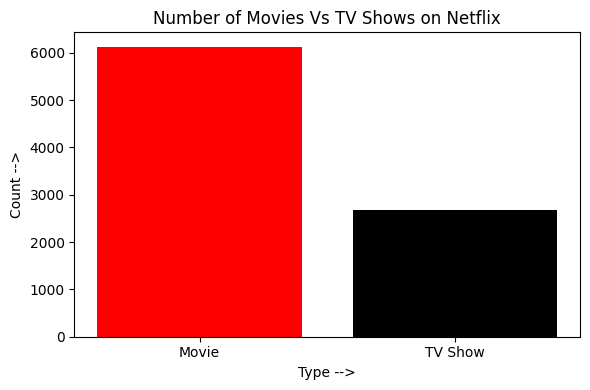

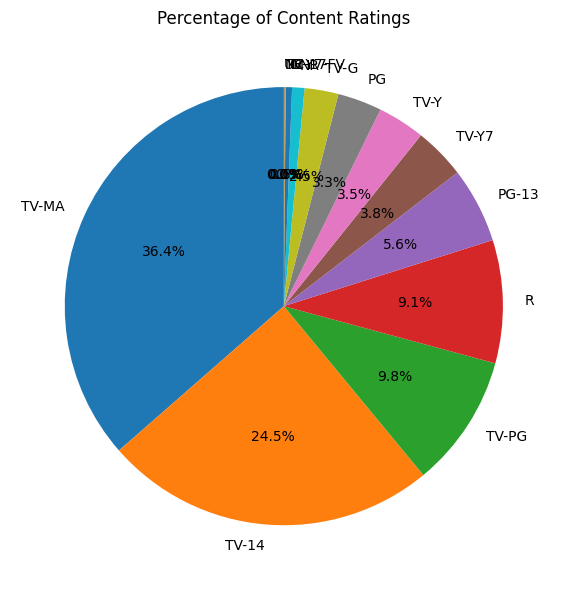

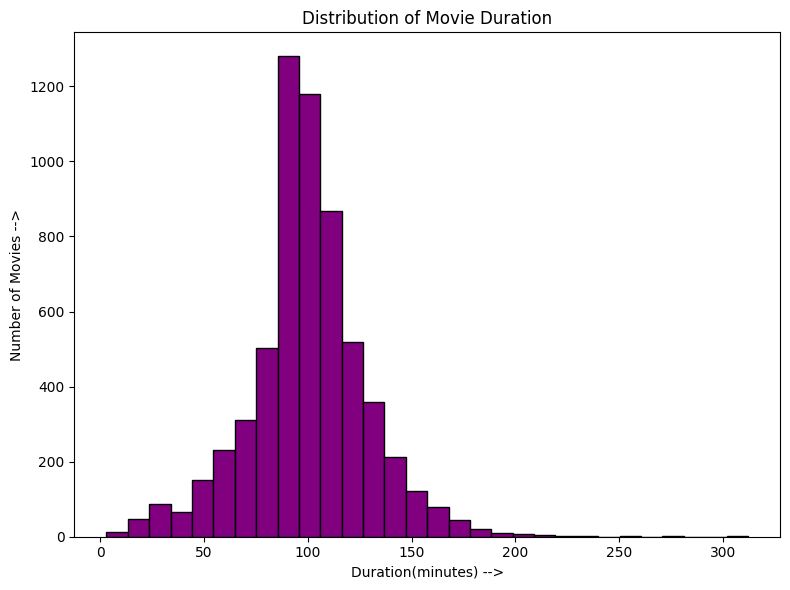

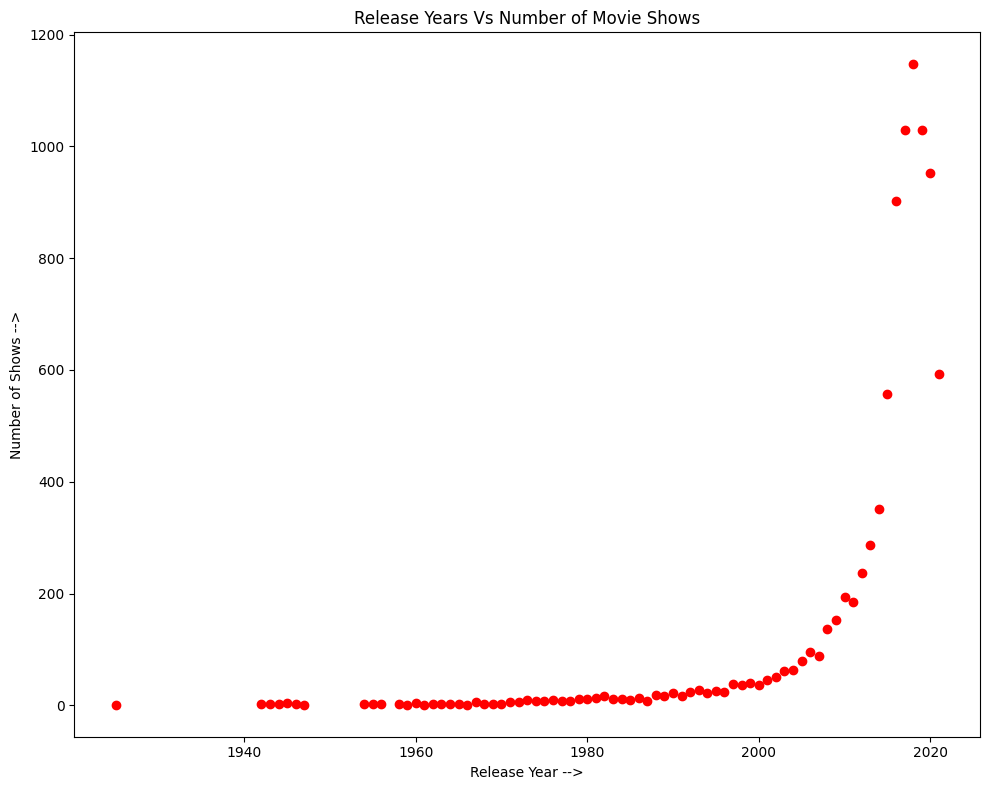

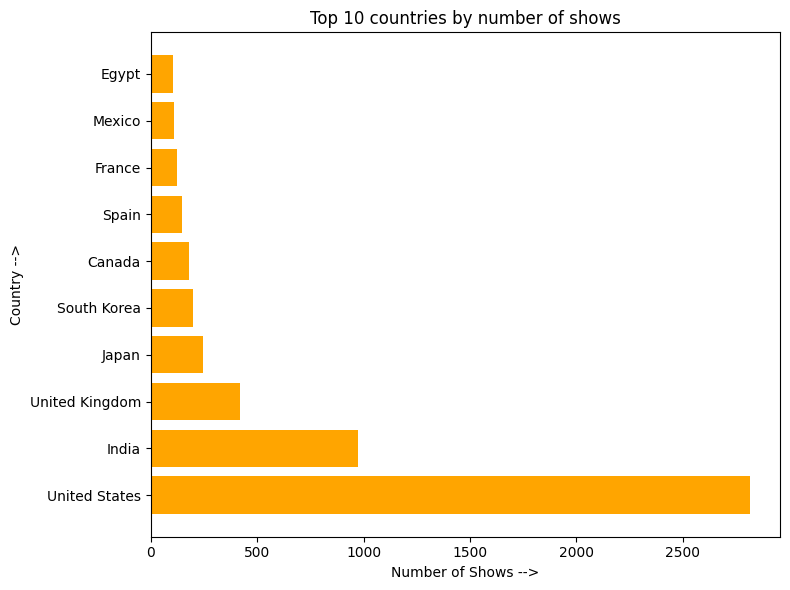

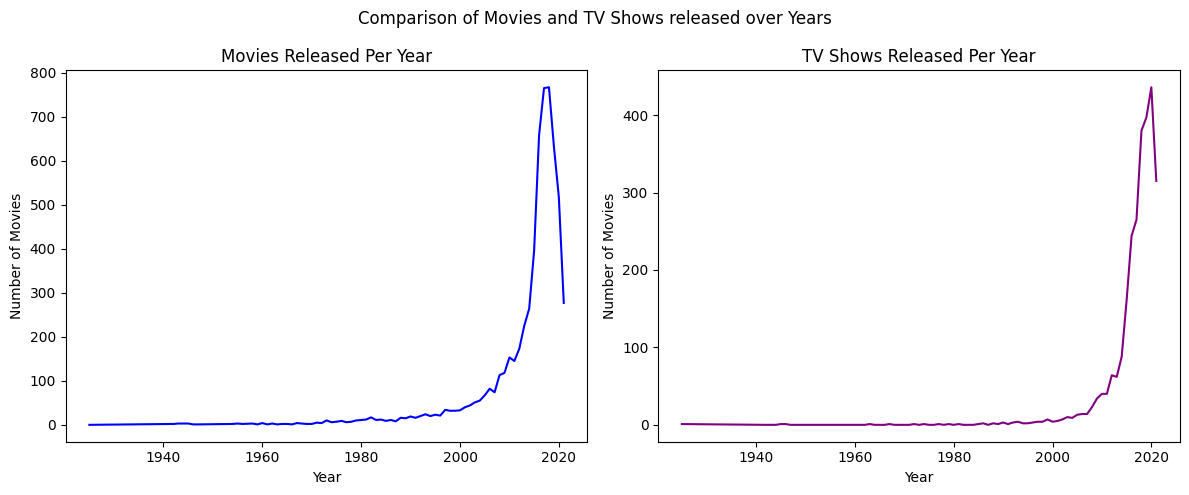

In [47]:
#Load the Libraries
import pandas as pd
import matplotlib.pyplot as plt

#Load the Data
df = pd.read_csv("/content/netflix-titlescsv/netflix_titles.csv", index_col=False)


#Clean the data
df.dropna(subset=["type","release_year","rating","duration"], inplace=True) #Used to remove the missing data.It removes the entire row even if one of the value is missing.
#inplace = True is used to make changes in actual dataset
#Subset is used to check in desired rows only like we done now.

type_counts = df["type"].value_counts() #Used to count number of values of each type.In this case , we have movies and TV shows
plt.figure(figsize =(6,4)) #Give dimenions to the chart being created(width,height)

plt.bar(type_counts.index,type_counts.values, color = ["Red","Black"])
plt.title("Number of Movies Vs TV Shows on Netflix")
plt.xlabel("Type -->")
plt.ylabel("Count -->")
plt.tight_layout()
plt.savefig("Movies_vs_Shows.png")
plt.show()


#Pie Chart of Content Rating
rating = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating,labels =rating.index,autopct = "%1.1f%%",startangle = 90)
plt.title("Percentage of Content Ratings")
plt.tight_layout()
plt.savefig("content.png")
plt.show()

#Histogram of Movie Duration
movies_df =  df[df['type'] == "Movie"].copy()
movies_df['duration_int'] = movies_df["duration"].str.replace('min','').astype(int)

plt.figure(figsize = (8,6))
plt.hist(movies_df["duration_int"], bins = 30 , color = "purple" , edgecolor = "black")
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration(minutes) -->")
plt.ylabel("Number of Movies -->")
plt.tight_layout()
plt.savefig("movie_duration_histogram.png")
plt.show()


#Scatter plot for seeing number of movies released overt he years
release_counts = df["release_year"].value_counts().sort_index()
plt.figure(figsize =(10,8))
plt.scatter(release_counts.index , release_counts.values , color= "red")
plt.title("Release Years Vs Number of Movie Shows")
plt.xlabel("Release Year -->")
plt.ylabel("Number of Shows -->")
plt.tight_layout()
plt.savefig("release_year_scatter.png")
plt.show()


#Vertical Bar Chart to check the number of shows released by each movie
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize = (8,6))
plt.barh(country_counts.index,country_counts.values , color = "Orange")
plt.title("Top 10 countries by number of shows")
plt.xlabel("Number of Shows -->")
plt.ylabel("Country -->")
plt.tight_layout()
plt.savefig("top10_countries.png")
plt.show()


content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
fig,ax = plt.subplots(1,2,figsize = (12,5))

#First Subplot : Movies
ax[0].plot(content_by_year.index , content_by_year['Movie'],color = "Blue")
ax[0].set_title("Movies Released Per Year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of Movies")

#Second Subplot : TV Shows
ax[1].plot(content_by_year.index , content_by_year['TV Show'],color = "Purple")
ax[1].set_title("TV Shows Released Per Year")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Number of Movies")

fig.suptitle("Comparison of Movies and TV Shows released over Years")
fig.tight_layout()
plt.savefig("movies_vs_tvshows_comparison.png")
plt.show()